<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

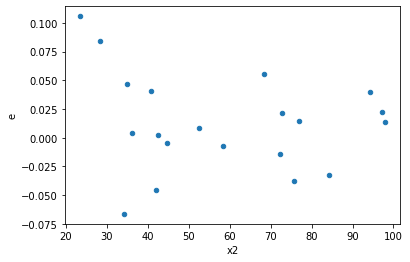

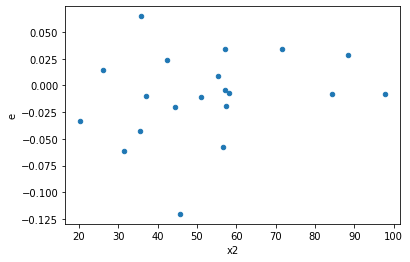

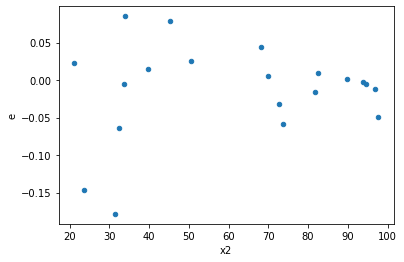

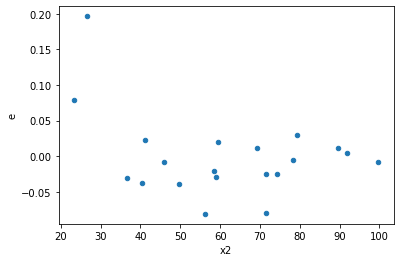

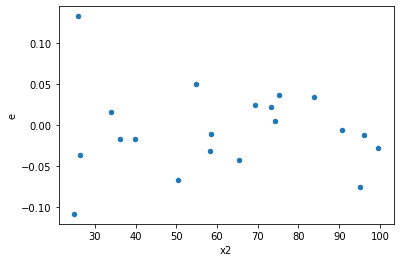

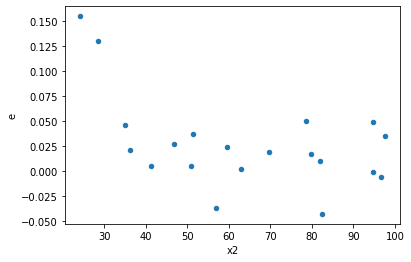

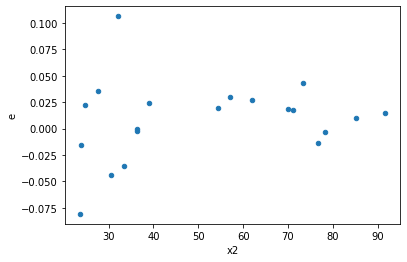

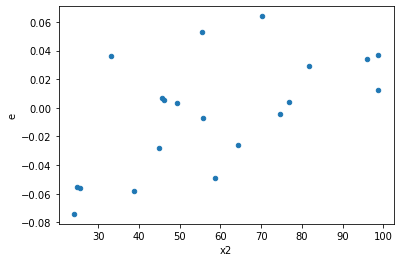

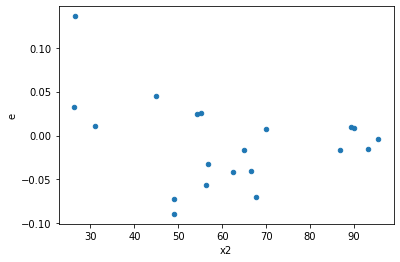

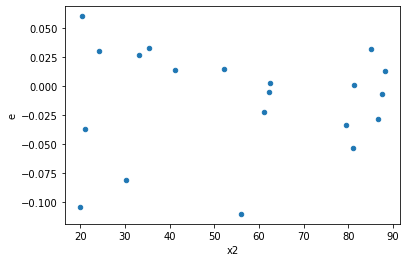

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,11.0,0.0038805753863541165,0.025848630057777645,0.0007761150772708233,0.002349875459797968,3.027741025288683,0.11684983877629795,0.941575080611851,0.05842491938814898,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,0.01176298264928472,0.015119259362854777,0.0013069980721427466,0.0021598941946935394,1.6525611175175796,0.5204235689854828,0.7397882155072586,0.2602117844927414,Reject001=1 : Homoscedasticity
2.0,10.0,6.0,0.007290291436286376,0.03876654621997968,0.0007290291436286376,0.00646109103666328,8.862596362751878,0.014699933591016512,0.9926500332044917,0.007349966795508256,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.005441653724216137,0.014382570189845642,0.0006802067155270171,0.0017978212737307052,2.643051344087028,0.190791003119136,0.904604498440432,0.095395501559568,Reject001=1 : Homoscedasticity
9.0,8.0,8.0,0.018186449652452218,0.019190172747647057,0.002273306206556527,0.002398771593455882,1.05519071145695,0.9412985599484747,0.5293507200257627,0.47064927997423733,Reject001=1 : Homoscedasticity
10.0,5.0,11.0,0.0014365904424066822,0.0058254458063536395,0.00028731808848133646,0.0005295859823957854,1.843204460933848,0.36968410864173595,0.815157945679132,0.18484205432086798,Reject001=1 : Homoscedasticity
13.0,9.0,7.0,0.018172855174375013,0.034382670336006366,0.0020192061304861123,0.00491181004800091,2.432545134368436,0.25427455503386875,0.8728627224830656,0.12713727751693438,Reject001=1 : Homoscedasticity
15.0,6.0,10.0,0.0064162715825312475,0.01195488520757233,0.0010693785970885413,0.0011954885207572329,1.1179282286105545,0.8334194970309061,0.5832902514845469,0.41670974851545306,Reject001=1 : Homoscedasticity
16.0,6.0,10.0,0.002302106828213483,0.038841828183577586,0.0003836844713689138,0.0038841828183577586,10.123377692351548,0.0018461599994792355,0.9990769200002604,0.0009230799997396177,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,11.0,0.0038805753863541165,0.025848630057777645,0.0007761150772708233,0.002349875459797968,3.027741025288683,0.11684983877629795,Reject001=1 : Homoscedasticity
1.0,9.0,7.0,0.01176298264928472,0.015119259362854777,0.0013069980721427466,0.0021598941946935394,1.6525611175175796,0.5204235689854828,Reject001=1 : Homoscedasticity
2.0,10.0,6.0,0.007290291436286376,0.03876654621997968,0.0007290291436286376,0.00646109103666328,8.862596362751878,0.014699933591016512,Reject001=1 : Homoscedasticity
3.0,5.0,11.0,0.03533796764320008,0.00990605830788717,0.007067593528640016,0.0009005507552624699,0.12741971529816581,0.03400014443516668,Reject001=1 : Homoscedasticity
4.0,9.0,7.0,0.040184622474061536,0.004473562894087036,0.004464958052673504,0.000639080413441005,0.1431324563191226,0.009501540139391437,Reject001=0 : Heteroscedasticity
5.0,9.0,7.0,0.010899358820882226,0.006743580226806237,0.001211039868986914,0.0009633686038294624,0.7954887601143643,0.7320339681397339,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,0.005441653724216137,0.014382570189845642,0.0006802067155270171,0.0017978212737307052,2.643051344087028,0.190791003119136,Reject001=1 : Homoscedasticity
7.0,6.0,10.0,0.009210679050199521,0.0065236994010166695,0.0015351131750332536,0.000652369940101667,0.424965371095545,0.30707087614089695,Reject001=1 : Homoscedasticity
8.0,12.0,4.0,0.03484543679940864,0.00023436735797143697,0.00290378639995072,5.859183949285924e-05,0.02017773741686152,4.604260686414125e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      861
Reject001=0 : Heteroscedasticity    139
Name: Result_test, dtype: int64